## Using AB test to make business decision

 
## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.   

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  My goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

 import libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.   

a. Read in the dataset and take a look at the top few rows here:

In [2]:
 df=pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape 

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
 df.query("group == 'control' and landing_page =='new_page' ").count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [7]:
 df.query("group == 'treatment' and landing_page =='old_page' ").count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [8]:
1928+1965

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2=df.drop(df[(df.group =='control') & (df.landing_page =='new_page')|(df.group=="treatment")& (df.landing_page=="old_page")].index)

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
 df2["duplicated"]=df2.user_id.duplicated() 
df2.head()


,user_id,timestamp,group,landing_page,converted,duplicated
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


c. What is the row information for the repeat **user_id**? 

In [14]:
df2.loc[df2["duplicated"]==True]

,user_id,timestamp,group,landing_page,converted,duplicated
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,True


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.user_id.drop_duplicates(keep=False, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,duplicated
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


In [16]:
df.landing_page.nunique()

2

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
old_converted=df2.query("group=='control'").converted.mean()
old_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
new_converted=df2.query("group=='treatment'").converted.mean() 
new_converted

0.11880724790277405

d. What is the probability that an individual received the new page?

In [20]:
df2.query("landing_page=='new_page'")["landing_page"].count()/df.landing_page.count()

0.49345282160297205

**Conclusion** Based on the comparison of the treatment group and control group's probabiliy of convert, old page has better chance lead to more conversions compare to the probabiliy of control group, thus the old page should remain. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

H0:P_new−P_old≤0
 
H1:P_new−P_old>0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new=df2.converted.mean()
p_new
 

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old=df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$?

In [23]:
n_new=df2.query("landing_page=='new_page'")["user_id"].count()
n_new

145311

d. What is $n_{old}$?

In [24]:
n_old=df2.query("landing_page=='old_page'")["user_id"].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted=np.random.binomial(n_new,p_new)
 

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted=np.random.binomial(n_old,p_old)
 

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
diff=(new_page_converted/n_new)-(old_page_converted/n_old)
diff

-0.00052608992115157904

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [28]:
p_diff=[]
for _ in range(10000):
    new_page_converted=np.random.binomial(n_new,p_new)
    old_page_converted=np.random.binomial(n_old,p_old)
    diff=(new_page_converted/n_new)-(old_page_converted/n_old)
    p_diff.append(diff)
 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

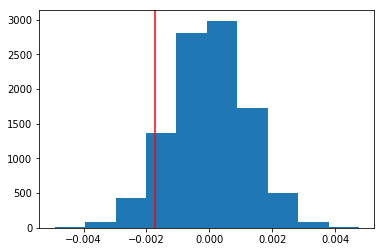

In [29]:
plt.hist(p_diff)
plt.axvline(x=diff,color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
actual_diff=df2.query("group=='treatment'")["converted"].mean()-df2.query("group=='control'")["converted"].mean()

(p_diff>actual_diff).mean()


0.9032

**Conclusion** Part j involves calculating what proportion of the conversion rate differences were greater than the actual observed difference, which was calculated from the conversion rate data. The special name given to the proportion of values in the null distribution that were greater than our observed difference is the "p-value."

With the high P value (90%), it inndicates that the null hypothesis is very likly to be true. That mean, the new page doesn't have higher convert rate and the old page should remain.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance.
Below is to calculate the number of conversions for each page and the number of individuals who received each page.  `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2.query("landing_page=='old_page'").converted.sum()
convert_new = df2.query("landing_page=='new_page'").converted.sum()
n_old = df2.query("landing_page=='old_page'")["user_id"].count()
n_new = df2.query("landing_page=='new_page'")["user_id"].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value. 

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old])
z_score,p_value

(-1.3116075339133115, 0.18965258971881804)

In [33]:
from scipy.stats import norm

print(norm.cdf(z_score)) # Tells us how significant our z-score is

print(norm.ppf(1-(0.05/2))) # Tells us what our critical value at 95% confidence is

0.0948262948594
1.95996398454


**Conclusion**Since the z-score of 0.09482 is within the critical value of 1.959963984540054, we accept the null hypothesis that the old page has almost same or less proportion to have higher convetion rate. This conclusion is the same as found in Parts J and K. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, I would like to know if the result acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.** Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, I first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2.head()

,user_id,timestamp,group,landing_page,converted,duplicated
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


In [35]:
df2["intercept"]=1
df2["ab_page"]=pd.get_dummies(df2["group"],drop_first=True) # create  new columns to store the dummy variables value
df2.head()

,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
regression=sm.Logit(df2["converted"],df2[["intercept","ab_page"]])
result=regression.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Mon, 29 Oct 2018   Pseudo R-squ.:               8.085e-06
Time:                        00:25:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

**Conclusion.**The p-value associated with ab_page is 0.19 and since it is larger than our Type 1 error rate
of .05, shows us that the landing page is not statistically significant in predicting whether the
viewer converts or not. The null and alternative hypotheses for the regression model are H0 P_new=P_old and H1: P_new!=P_old , which solely predicts if there is a difference in the two values. This is different from the p-value found in Part II. In Part II, the null and alternative hypotheses were H0: P_new<=P_old and H1: P_new>P_old , which predicts which page gets more conversions.
 


f. I also want to consider other things that might influence whether or not an individual converts.   why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Conclusion.** In real world, there are many other factors may affecting our A/B testing result. In this dataset for example, people could just simply doesn't like the idea change to a new page given the fact that the new page is much better serving users. Or users could just simply love the new page because it is new given the fact the old page actaully serves them better. Thus, we should consider other factors as well when interpreting A/B testing result. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. I will need to read in the **countries.csv** dataset and merge together my datasets on the approporiate rows. 

In [38]:
df_country=pd.read_csv("countries.csv")
df_country.head()


,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [39]:
df_country["country"].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [40]:
# join df_2 with df_country
df3=df2.merge(df_country, on='user_id', how='inner')
df3.head()

,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,US


In [47]:
# create two columns to get dummy variables for country values

df4=df3.join(pd.get_dummies(df3["country"]))
df4.head()


,user_id,timestamp,group,landing_page,converted,duplicated,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False,1,0,US,0,0,1


In [49]:
#create and fit regression model
sm.Logit(df4["converted"],df4[["intercept","UK","CA"]]).fit().summary()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Mon, 29 Oct 2018   Pseudo R-squ.:               1.521e-05
Time:                        00:30:16   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9967      0.007   -292.315      0.000      -2.010      -1.983
UK             0.0099      0.013      0.746      0.456      -0.016       0.036
CA            -0.0408      0.027     -1.518      0.129      -0.093       0.012
==============================================================================
"""

h. Though I have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
sm.Logit(df4["converted"],df4[["intercept","ab_page","UK","CA"]]).fit().summary()


Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Mon, 29 Oct 2018   Pseudo R-squ.:               2.324e-05
Time:                        00:36:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0150      0.011     -1.308      0.191      -0.037       0.007
UK             0.0099      0.013      0.744      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

**As all P value are greater than the type I error(5%), thus,there is we accept null hypothesis. There is no significant difference of convert rate even with condsideration of the country.**